In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B07A748>,
      dtype=object)

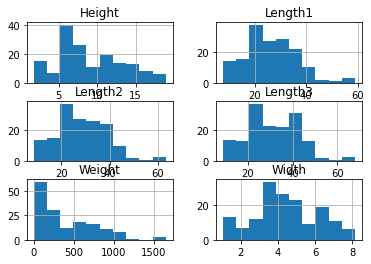

In [4]:
df.hist()

In [5]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
number = df[['Species']].values
num = pd.Index(number)
pd.value_counts(num)

(Perch,)        56
(Bream,)        35
(Roach,)        20
(Pike,)         17
(Smelt,)        14
(Parkki,)       11
(Whitefish,)     6
dtype: int64

In [7]:
df['Species'].replace(to_replace=['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'], value=[0,1,2,3,4,5,6],inplace=True)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
x = df[['Species','Length1','Length2','Length3','Height']].values


In [9]:
x[0:5]

array([[ 1.    , 23.2   , 25.4   , 30.    , 11.52  ],
       [ 1.    , 24.    , 26.3   , 31.2   , 12.48  ],
       [ 1.    , 23.9   , 26.5   , 31.1   , 12.3778],
       [ 1.    , 26.3   , 29.    , 33.5   , 12.73  ],
       [ 1.    , 26.5   , 29.    , 34.    , 12.444 ]])

In [10]:
y = df[['Weight']].values

In [11]:
y[0:5]

array([[242.],
       [290.],
       [340.],
       [363.],
       [430.]])


# Normalize Data

In [12]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)    
x[0:5]

array([[-0.39866964, -0.30578858, -0.28230301, -0.10602023,  0.59657867],
       [-0.39866964, -0.22550724, -0.19805366, -0.00233668,  0.82126055],
       [-0.39866964, -0.23554241, -0.17933159, -0.01097698,  0.79734129],
       [-0.39866964,  0.0053016 ,  0.05469437,  0.19639012,  0.87977146],
       [-0.39866964,  0.02537193,  0.05469437,  0.23959159,  0.81283498]])

# Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [15]:
x_train.shape, y_train.shape

((127, 5), (127, 1))

In [16]:
x_test.shape, y_test.shape

((32, 5), (32, 1))

In [17]:
import matplotlib.pyplot as plt
import numpy as np

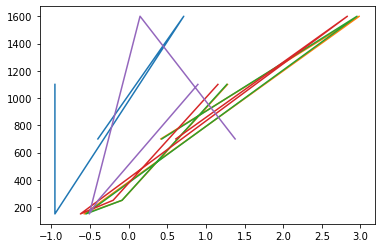

In [18]:
plt.plot(x_train[0:5], y_train[:5])
plt.show()

#  Algo Knn Library

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k = 15
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train.astype(int),y_train.astype(int))
neigh

<ipython-input-36-367807e7515c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train.astype(int),y_train.astype(int))


KNeighborsClassifier(n_neighbors=15)

In [37]:
y_predict = neigh.predict(x_test)
print(y_predict[0:5])
print(y_test[0:5])

[ 700 1000  700 1000    9]
[[ 600.]
 [ 430.]
 [ 720.]
 [1100.]
 [ 110.]]


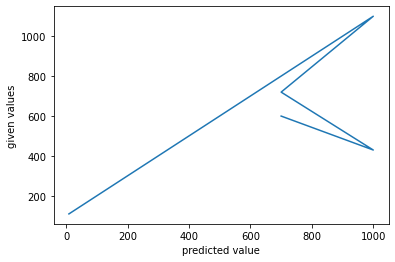

In [38]:
plt.plot(y_predict[0:5], y_test[0:5])
plt.ylabel('given values')
plt.xlabel('predicted value')
plt.show()

# Accuracy Evaluation 

In [39]:
from sklearn import metrics
metrics.accuracy_score(y_train.astype(int), neigh.predict(x_train))

0.09448818897637795

In [40]:
metrics.accuracy_score(y_test.astype(int),y_predict)

0.0625

In [41]:
neigh.predict([[1.    , 23.2   , 25.4   , 30.    , 11.52 ]])

array([1000])